## 0. Simulate phone dataset (*)
We want to simulate data  (𝑥,𝑦)  to represent cost for phone subscriptions, with:
* 𝑥  - called minutes per month
* 𝑦  - SEK per month
###  a) Use numpy.random.normal() to simulate a dataset with the following requirements:(*)
* #### set a seed to 42 (for reproducibility and reference)
* #### simulate 400 x-values from the r.v.  𝑋∼$ \mathscr{N} $(100,100) 
* #### take absolute value of these x-values
* #### simulate noise 400 noise values from r.v. 𝜖∼$ \mathscr{N} $(0,50) 
* #### Let  𝑦=2𝑥+25+𝜖 
* #### plot the data set

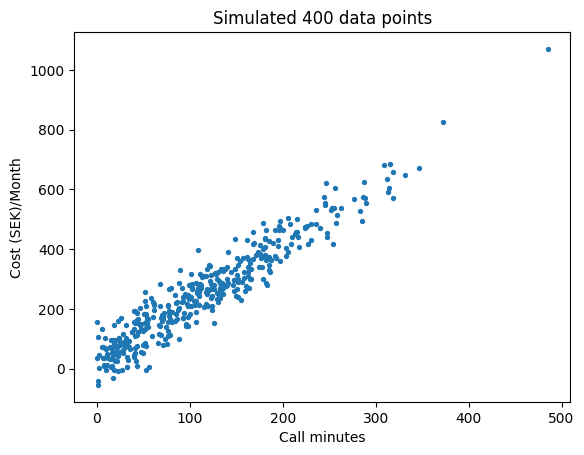

In [45]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

def simulate_x_values():
    x_values = np.abs(np.random.normal(100, 100, 400))  # mu 100, std 100, samples 400
    return x_values

def simulate_y_values(x):
    noise = np.random.normal(0, 50, len(x))  # loc is 0, scale is 50, len(x) är shape för outputen (1d array)
    y = 2*x + 25 + noise
    return y

x = simulate_x_values()
y = simulate_y_values(x)


plt.scatter(x, y, s=8)
plt.xlabel('Call minutes')
plt.ylabel('Cost (SEK)/Month')
plt.title('Simulated 400 data points')
plt.show()


#### b) Now we want to remove some outliers according to this assumption: (*)
* no one talks more than 300 min using this type of subscription
* no ones costs can be negative
* plot the new dataset
* also plot ground truth using the true parameters  𝛽0=25,𝛽1=2 

(400,) (400,)


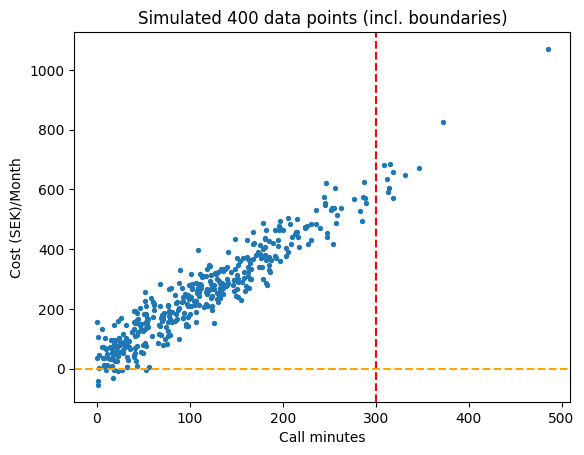

In [46]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

def simulate_x_values():
    x_values = np.abs(np.random.normal(100, 100, 400))  # mu 100, std 100, samples 400
    return x_values

def simulate_y_values(x):
    noise = np.random.normal(0, 50, len(x))  # loc is 0, scale is 50, len(x) är shape för outputen (1d array)
    y = 2*x + 25 + noise
    return y

print(y.shape, x.shape)


plt.scatter(x, y, s=8)
plt.axvline(x=300, color='red', linestyle="--")  # Boundaries for (talk < 300)
plt.axhline(y=0, color='orange', linestyle="--")
plt.xlabel('Call minutes')
plt.ylabel('Cost (SEK)/Month')
plt.title('Simulated 400 data points (incl. boundaries)')
plt.show()


(400,) (400,)


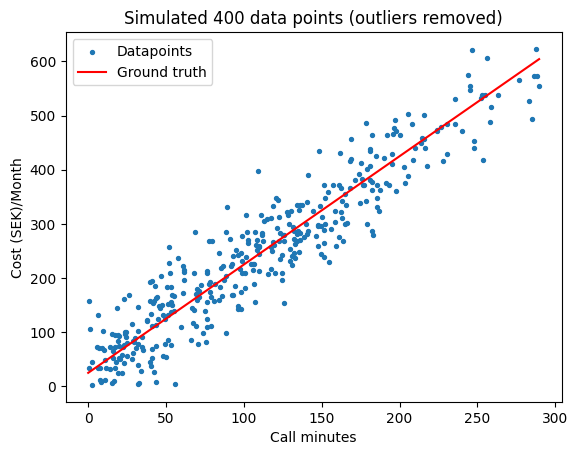

In [47]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

x = np.abs(np.random.normal(100, 100, 400))  # mu 100, std 100, samples 400
noise = np.random.normal(0, scale=50, size=400)  # loc is 0, scale is 50
y = 2*x + 25 + noise

print(y.shape, x.shape)

mask = (x < 300) & (y > 0)
x, y= x[mask], y[mask]

# Plot dataset without outliers
plt.scatter(x, y, s=8, label='Datapoints')
plt.xlabel('Call minutes')
plt.ylabel('Cost (SEK)/Month')
plt.title('Simulated 400 data points (outliers removed)')

# Plot ground truth
ground_truth_x = np.linspace(0, np.max(x), 100)
ground_truth_y = 2*ground_truth_x + 25
plt.plot(ground_truth_x, ground_truth_y, color='r', label='Ground truth')
plt.legend()
plt.show()

### c) Insert the values into a DataFrame (*)

In [48]:
import pandas as pd

df = pd.DataFrame({'Minutes': x, 'Cost': y})

df.head(10)


,Minutes,Cost
0,149.671415,244.621448
1,86.173570,167.378389
2,164.768854,354.799893
3,252.302986,531.955001
4,76.584663,155.666051
5,76.586304,209.315105
6,257.921282,487.461542
7,176.743473,371.367972
8,53.052561,137.119904
9,154.256004,359.233950


### 1. Train|test split (*)
Before moving on with linear regression we shall first perform a train-test-split.
*  a) Create a train-test-split function with the following call signature: (*)

def train_test_split(X: pd.DataFrame, y: pd.DataFrame, train_fraction=.7: float,random_state=42: int, replace=False: bool) -> tuple

that returns the tuple:

(X_train, X_test, y_train, y_test)

In [49]:
def train_test_split(X: pd.DataFrame, y: pd.DataFrame, train_fraction:float=0.7, random_state: int=42, replace: bool=False) -> tuple:
    train_fraction = int(len(X) * train_fraction)

    X_train = X[:train_fraction]
    y_train = y[:train_fraction]
    X_test = X[train_fraction:]
    y_test = y[train_fraction:]

    return (X_train, X_test, y_train, y_test)

X_train, X_test, y_train, y_test = train_test_split(x, y)


# Funkar
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(266,) (115,) (266,) (115,)


In [50]:
df_X_train = pd.DataFrame({'Intercept': 1, 'Minutes': X_train, 'Cost': y_train})

df_X_train.head(10)


,Intercept,Minutes,Cost
0,1,149.671415,244.621448
1,1,86.173570,167.378389
2,1,164.768854,354.799893
3,1,252.302986,531.955001
4,1,76.584663,155.666051
5,1,76.586304,209.315105
6,1,257.921282,487.461542
7,1,176.743473,371.367972
8,1,53.052561,137.119904
9,1,154.256004,359.233950


### 2. Simple linear regression with normal equation (*)
* Use the normal equation for simple linear regression to solve for the coefficients  𝛽̂=(𝛽0,𝛽1) . 
* Note that you should only use the training data to fit the regression line, and not data from the test set. Plot the the regression line, together with ground truth and training data.


𝛽̂ = (Xᵀ X)⁻¹ Xᵀ Y

In [60]:
def add_intercept(x):
    intercept = np.ones(len(x))
    x = np.c_[intercept, x]
    return x


X_train = add_intercept(X_train)
X_test = add_intercept(X_test)


#     intercept

# intercept = np.ones(len(X_train))
# intercept

In [62]:
X_train.shape, X_test.shape, X_train[:3], X_test[:3]

((266, 2),
 (115, 2),
 array([[  1.        , 149.6714153 ],
        [  1.        ,  86.17356988],
        [  1.        , 164.76885381]]),
 array([[  1.        ,  39.97831228],
        [  1.        , 106.9802085 ],
        [  1.        ,  61.46864031]]))

In [63]:
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
y_train.shape, y_test.shape, y_train[:3], y_test[:3]

((266, 1),
 (115, 1),
 array([[244.62144766],
        [167.37838862],
        [354.79989261]]),
 array([[192.57014674],
        [285.74433666],
        [211.51503538]]))

In [65]:
regression_fit = lambda X,y: np.linalg.inv(X.T@X)@X.T@y  # Vi vill ha den som en funktion för att kunna återanvända formen
beta_hat = regression_fit(X_train, y_train)

beta_hat

array([[30.97836413],
       [ 1.92936785]])

In [66]:
predict = lambda X, beta: X @ beta


y_hat = predict(X_test, beta_hat)

y_hat[:5]


array([[108.11123442],
       [237.38253865],
       [149.57398234],
       [245.81682041],
       [351.66451218]])

In [67]:
beta_hat.shape

(2, 1)

In [72]:
X_test.shape

(115, 2)

In [87]:
X_train.shape

(266, 2)

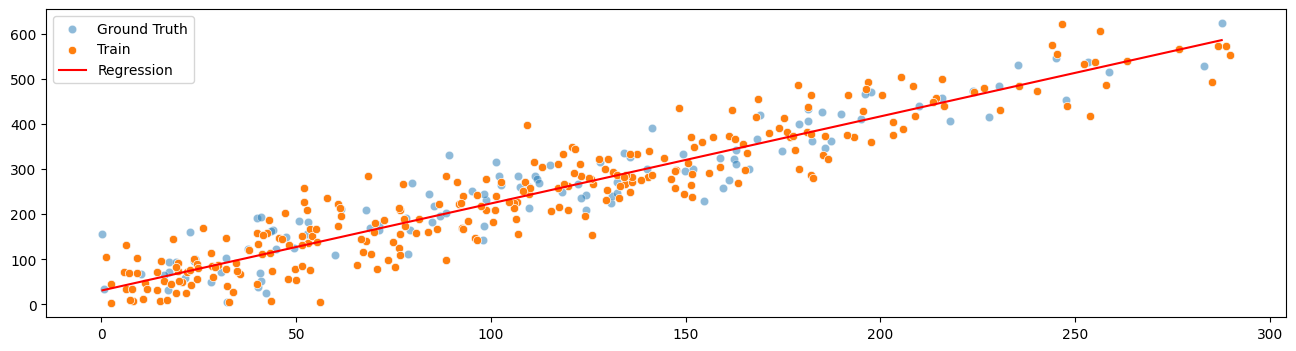

In [86]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(16,4))
sns.scatterplot(x=x, y=y, alpha=.5, label='Ground Truth')
sns.scatterplot(x=X_train[:,1], y=y_train[:,0], label='Train')
sns.lineplot(x=X_test[:,1], y=y_hat[:,0], color='red', label='Regression');  # Uses slicing to fix the 1:Dimensional problem
plt.legend();